In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. 데이터 불러오기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [3]:
# 자체적으로 train/test구별
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
print(train_X.shape) # 3D ---> Tensor
print(train_y.shape) # 1D ---> vecotr
print(test_X.shape)
print(test_y.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 2. OVER FITTING 연결 DROP

목적 : epoch 10번 내외에서 금방 OF걸리는 것 같다.
-  내 모델 자체가 너무 OF 설계된 것이 아닌가 의심해봄
+ HL 을 좀 여러 개 하면서 너무 연결을 타이트하게 해서, 모델 구조가 OF 구조를 사용한 것이 아닌지 확인
-  중간중간 연결을 자르기

In [4]:
# 모델 구조 : 1개 샘플단위로 설계!!!!!!!!
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten( input_shape =( 28,28)),
        # 2) HL : 일반적인 Dense 레이어로 기능

        # + 모든 784개 픽셀 다 쓰지 말고,,좀 줄여서 쓰자.
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=128, activation="relu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=64, activation="relu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=32, activation="relu"),

        # 3) output Layer 설계
        tf.keras.layers.Dense( units =10,activation="softmax" )
    ]
)
model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [7]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["accuracy"]
)

history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),

    epochs = 50,
    batch_size = 256,
    validation_split=0.25
)

Epoch 1/50
176/176 [==============================] - 3s 12ms/step - loss: 9.0959 - accuracy: 0.4637 - val_loss: 1.0734 - val_accuracy: 0.6539
Epoch 2/50
176/176 [==============================] - 3s 15ms/step - loss: 1.4271 - accuracy: 0.5947 - val_loss: 0.8301 - val_accuracy: 0.6983
Epoch 3/50
176/176 [==============================] - 2s 11ms/step - loss: 1.0765 - accuracy: 0.6557 - val_loss: 0.7234 - val_accuracy: 0.7455
Epoch 4/50
176/176 [==============================] - 2s 10ms/step - loss: 0.9045 - accuracy: 0.6958 - val_loss: 0.6316 - val_accuracy: 0.7600
Epoch 5/50
176/176 [==============================] - 2s 10ms/step - loss: 0.8084 - accuracy: 0.7211 - val_loss: 0.6009 - val_accuracy: 0.7843
Epoch 6/50
176/176 [==============================] - 2s 11ms/step - loss: 0.7397 - accuracy: 0.7387 - val_loss: 0.5649 - val_accuracy: 0.7961
Epoch 7/50
176/176 [==============================] - 2s 10ms/step - loss: 0.6919 - accuracy: 0.7547 - val_loss: 0.5312 - val_accuracy: 0.8039

# 3. PATIENCE 지정하기

In [14]:
# --> 학습 과정에서 모델별로 weights를 저장을 하려고 함!!!
# 1) callback_part1 : 학습과정에 epoch가 끝나면,, 저장을 하려고 함..
#                    ==> 과거의 epoch의 weights를 불러와서.적요..
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir =os.path.dirname(checkpoint_path)
# ==> callback 세팅!!!
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    verbose=1,
    save_weights_only = True
)
# 2) callback_part2 : 모델을 학습 과정에서 중간에 때려칩시다!!!
#                    earlystopping
#   ==> 무엇을 기준으로 때려칠것인가!!!!!! : 어떤 값을 모니터링!!!
#   ==> 몇 번을 기회를 줄 것인가!!!
#       참고) 꼭은 아닌데,,,val쪽을 모니터링을 함...
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor ="val_loss",
    patience = 5
)

In [15]:
# 모델 구조 : 1개 샘플단위로 설계!!!!!!!!
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten( input_shape =( 28,28)),
        # 2) HL : 일반적인 Dense 레이어로 기능

        # + 모든 784개 픽셀 다 쓰지 말고,,좀 줄여서 쓰자.
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=128, activation="relu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=64, activation="relㅁu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=32, activation="relu"),
        # 3) output Layer 설계
        tf.keras.layers.Dense( units =10,activation="softmax" )
    ]
)

# 이 모델에 있는 weights들을 어찌 학습할까???
# ==> 세티!!!!
model.compile(
    loss = "categorical_crossentropy", # 정답을 OHE
    optimizer = tf.keras.optimizers.Adam(),
    # 주어진 약 10개의 weight 파라미터를
    # loss CE관점으로 어찌 최적화를 할지에 대한 방식
    # GD --> 인공신경망,,,, Adam()최적화 방식...
    metrics =["accuracy"]
    # 잘 학습이 되는지 모니터링 지표...
)

# 인공신경망으로 분류!
# + 정답에 대한 처리!!!!!
history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),
    # 얼마나 많은 train  데이터를 재활용할까요 epoch
    epochs = 100,# 성능train--> OverFit + 시간!!!!
    batch_size = 256, # 여러분들의 HW 스펙에 ...GPU-> RAM
    validation_split=0.25,

    ### ++ callback 추가!!!! etc......
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
175/176 [============================>.] - ETA: 0s - loss: 6.1316 - accuracy: 0.5136
Epoch 1: saving model to training/cp-0001.ckpt
176/176 [==============================] - 3s 12ms/step - loss: 6.1122 - accuracy: 0.5141 - val_loss: 0.9129 - val_accuracy: 0.7039
Epoch 2/100
174/176 [============================>.] - ETA: 0s - loss: 1.1726 - accuracy: 0.6470
Epoch 2: saving model to training/cp-0002.ckpt
176/176 [==============================] - 2s 10ms/step - loss: 1.1699 - accuracy: 0.6474 - val_loss: 0.7234 - val_accuracy: 0.7605
Epoch 3/100
171/176 [============================>.] - ETA: 0s - loss: 0.8950 - accuracy: 0.6986
Epoch 3: saving model to training/cp-0003.ckpt
176/176 [==============================] - 2s 10ms/step - loss: 0.8919 - accuracy: 0.6994 - val_loss: 0.6271 - val_accuracy: 0.7873
Epoch 4/100
171/176 [============================>.] - ETA: 0s - loss: 0.7675 - accuracy: 0.7353
Epoch 4: saving model to training/cp-0004.ckpt
176/176 [===================

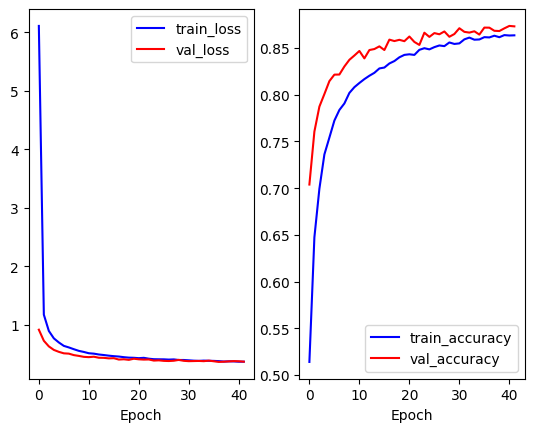

In [16]:
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

# 4. 괜찮은 성능의 Weight부터 다시 학습

In [17]:
# 1) 불러올 모델이 저장된 경로...
# 주의!!!) 실제 os상 보이는 파일명으로 불러오면 안 됨!!!
# --> 내가 callback 지정한 양식으로 불러야 함.
load_cp_weights = "training/cp-0042.ckpt"
# ==> 눈에 보이는 것이 아니라 설정한 양식대로!!!!

# 2) 불러온 가중치를 채울 틀/(모델 구조!!설계도!!!)
model_bc = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten( input_shape =( 28,28)),
        # 2) HL : 일반적인 Dense 레이어로 기능

        # + 모든 784개 픽셀 다 쓰지 말고,,좀 줄여서 쓰자.
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=128, activation="relu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=64, activation="relu"),
        tf.keras.layers.Dropout( 0.1),
        tf.keras.layers.Dense( units=32, activation="relu"),
        # 3) output Layer 설계
        tf.keras.layers.Dense( units =10,activation="softmax" )
    ]
)
# 3) 설계도에 불러온 weight를 채워야!!!!
# ===> 설계도와 weight가 정확히 일치해야 함!!!
model_bc.compile(
    loss = "categorical_crossentropy", # 정답을 OHE
    optimizer = tf.keras.optimizers.Adam(),
    # 주어진 약 10개의 weight 파라미터를
    # loss CE관점으로 어찌 최적화를 할지에 대한 방식
    # GD --> 인공신경망,,,, Adam()최적화 방식...
    metrics =["accuracy"]
    # 잘 학습이 되는지 모니터링 지표...
)
model_bc.load_weights(load_cp_weights )

In [20]:
model_bc.evaluate(test_X, tf.keras.utils.to_categorical(test_y, num_classes=10))

313/313 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8635


[0.37967777252197266, 0.8634999990463257]

In [ ]:
# 결론 : fashion - MNIST 셋을 가지고 DNN 구조 방식으로 설계를 하면
  # ACC 0.9 를 넘기기 쉽지가 않음.
  # -> 내 데이터에 대해서 FNN 설계방식으로 한계가 있음
  # -> 시도할 다른 방법 : 설계 방식의 근본적이 ㄴ다른 방식 차용
  #   : 이미지 데이터 : CNN 구조로 해볼까
  # + 설계 방식에 따라서 기본 성능 자체가 다름